#Kaggle Titanic ML
###Cole Hanlon

In [819]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [820]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [821]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


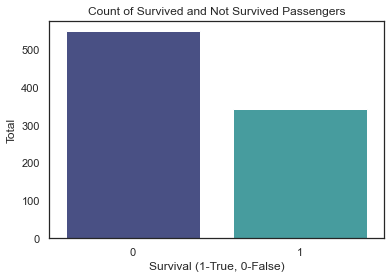

In [822]:
ax = sns.countplot(x="Survived", data=train, palette="mako")
ax.set(xlabel="Survival (1-True, 0-False)", ylabel = "Total", title="Count of Survived and Not Survived Passengers")
plt.show()

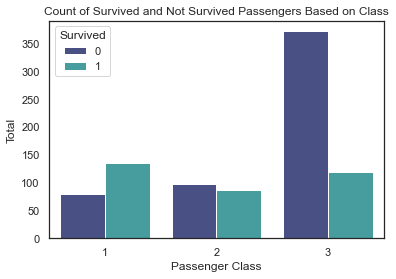

In [823]:
ax = sns.countplot(x="Pclass", hue="Survived", data=train, palette="mako")
ax.set(xlabel="Passenger Class", ylabel = "Total", title="Count of Survived and Not Survived Passengers Based on Class")
plt.show()

C:\Users\colet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\colet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


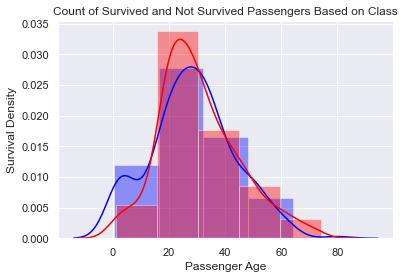

In [824]:
sns.set(palette="mako")
ax = sns.distplot(train[train.Survived==1]["Age"],color="b", bins=5, label="1")
sns.distplot(train[train.Survived==0]["Age"],color="r", bins=5, label="0")
ax.set(xlabel="Passenger Age", ylabel = "Survival Density", title="Count of Survived and Not Survived Passengers Based on Class")
plt.show()

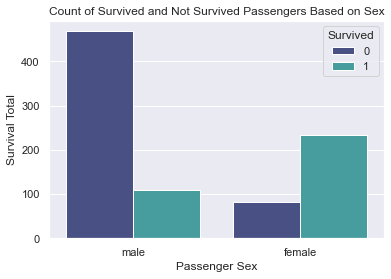

In [825]:
ax = sns.countplot(x="Sex", hue="Survived", data=train, palette="mako")
ax.set(xlabel="Passenger Sex", ylabel = "Survival Total", title="Count of Survived and Not Survived Passengers Based on Sex")
plt.show()

C:\Users\colet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


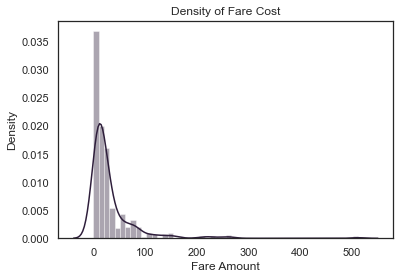

In [826]:
sns.set(style="white", palette="mako", color_codes=True)
ax = sns.distplot(train["Fare"])
ax.set(xlabel="Fare Amount", ylabel = "Density", title="Density of Fare Cost")
plt.show()

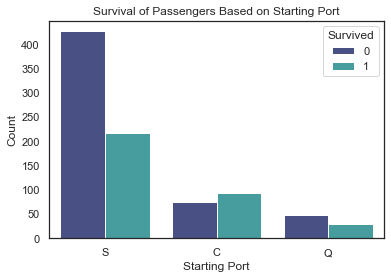

In [827]:
ax = sns.countplot(x="Embarked", hue="Survived", data=train, palette="mako")
ax.set(xlabel="Starting Port", ylabel = "Count", title="Survival of Passengers Based on Starting Port")
plt.show()

In [828]:
train = pd.read_csv("data/train.csv")

train = train.drop(['Cabin'], 1, inplace=False) 
train = train.dropna()

y_train = train['Survived'] 
x_train = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], 1, inplace=True) 
x_train = pd.get_dummies(train) 

C:\Users\colet\AppData\Local\Temp/ipykernel_20040/3718757656.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train = train.drop(['Cabin'], 1, inplace=False)
C:\Users\colet\AppData\Local\Temp/ipykernel_20040/3718757656.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train = train.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], 1, inplace=True)


In [829]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report

dTreeClass = tree.DecisionTreeClassifier()
dTreeClass.fit(x_train, y_train)

DecisionTreeClassifier()

In [830]:
saved_pass_ids = test[['PassengerId']] 
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1, inplace=True) 

test.fillna(2, inplace=True)

test = pd.get_dummies(test)

C:\Users\colet\AppData\Local\Temp/ipykernel_20040/1276875164.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1, inplace=True)


In [831]:
preds = dTreeClass.predict(test)
results = saved_pass_ids.assign(Survived = preds)

results.to_csv("data/results.csv", index=False) 

In [832]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [833]:
train['Age'].fillna(train['Age'].median(), inplace=True) 
train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace=True) 

class_dict = {1:'1st',2:'2nd',3:'3rd'} 
train['Pclass'] = train['Pclass'].map(class_dict)

train.drop(['PassengerId','Name','Ticket','Cabin'], 1, inplace=True) 

cat_vars = train[['Pclass','Sex','Embarked']] 
dummies = pd.get_dummies(cat_vars, drop_first=True)

train = train.drop(['Pclass','Sex','Embarked'], axis=1) 

train = pd.concat([train, dummies], axis=1) 

C:\Users\colet\AppData\Local\Temp/ipykernel_20040/695922348.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop(['PassengerId','Name','Ticket','Cabin'], 1, inplace=True)


In [834]:
y = train['Survived']
x = train.drop(['Survived'],1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

C:\Users\colet\AppData\Local\Temp/ipykernel_20040/3131290879.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = train.drop(['Survived'],1)


In [835]:
from sklearn.ensemble import GradientBoostingClassifier

gBoostClassifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=3)
gBoostClassifier.fit(x_train, y_train)
preds = gBoostClassifier.predict(x_test)

In [836]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       168
           1       0.83      0.68      0.75       100

    accuracy                           0.83       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.83      0.82       268



In [837]:
#train = pd.read_csv("data/train.csv")
#test = pd.read_csv("data/test.csv")

In [838]:
test['Age'].fillna(test['Age'].median(), inplace=True) 
test['Fare'].fillna(test['Fare'].median(), inplace=True) 

class_dict = {1:'1st',2:'2nd',3:'3rd'} 

test['Pclass'] = test['Pclass'].map(class_dict)

test['Embarked'].fillna(test['Embarked'].value_counts().index[0], inplace=True) 

save_ids = test[['PassengerId']]

test.drop(['PassengerId','Name','Ticket','Cabin'], 1, inplace=True)

cat_vars = test[['Pclass','Sex','Embarked']]
dummies = pd.get_dummies(cat_vars, drop_first=True)

test = test.drop(['Pclass','Sex','Embarked'],axis=1)

test = pd.concat([test, dummies], axis=1)

C:\Users\colet\AppData\Local\Temp/ipykernel_20040/63195174.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test.drop(['PassengerId','Name','Ticket','Cabin'],1,inplace=True)


In [839]:
preds = gBoostClassifier.predict(test)
results = save_ids.assign(Survived = preds)

results.to_csv('data/results.csv', index=False)

In [840]:
y = train['Survived']
x = train.drop(['Survived'], 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

C:\Users\colet\AppData\Local\Temp/ipykernel_20040/1546794653.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = train.drop(['Survived'], 1)


In [841]:
from sklearn.ensemble import RandomForestClassifier

rForestClassifier = RandomForestClassifier(n_estimators=100)

rForestClassifier.fit(x_train, y_train)
y_pred = rForestClassifier.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       153
           1       0.83      0.70      0.76       115

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

